## Common instructions

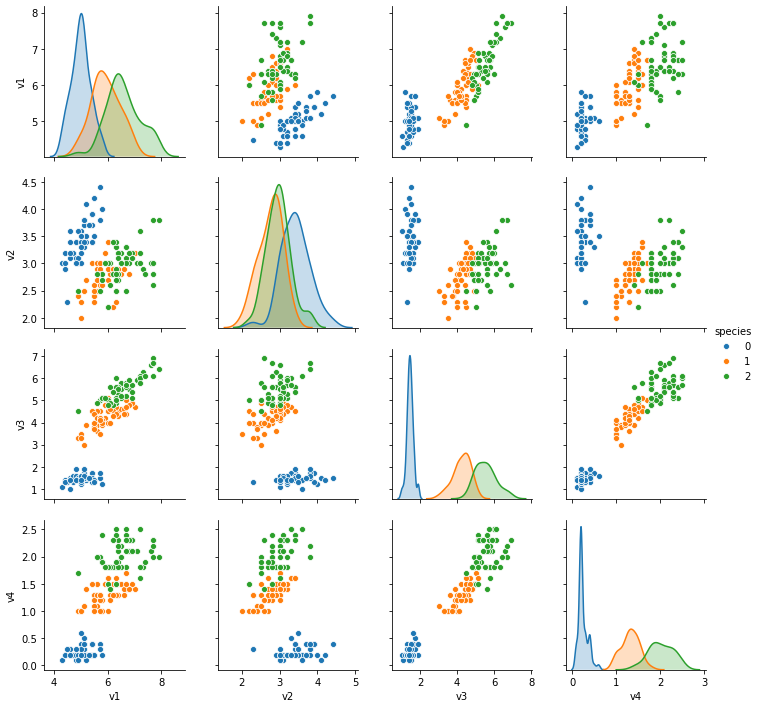

sepal_length - sepal_width
sepal_length - petal_length
sepal_length - petal_width
sepal_width - petal_length
sepal_width - petal_width
petal_length - petal_width
                   pre       rec       spe        f1       geo       iba       sup

          0     1.0000    1.0000    1.0000    1.0000    1.0000    1.0000        13
          1     1.0000    0.8125    1.0000    0.8966    0.9014    0.7973        16
          2     0.7500    1.0000    0.8966    0.8571    0.9469    0.9058         9

avg / total     0.9408    0.9211    0.9755    0.9226    0.9459    0.8923        38

[0 1 2]


D:\Anaconda3\envs\jupyter-science-37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [1]:
import pandas as pd
from sklearn import datasets

# To show all plots in the first time that is executed
%matplotlib inline

# Delete column v5 of dataset
iris = datasets.load_iris()
init_data = pd.DataFrame(iris.data, columns = ['v1', 'v2', 'v3' ,'v4'])
init_data.drop('v4', axis=1, inplace=True)

# Replace target from categorical to numerical
iris_target = pd.DataFrame(iris.target, columns = ['species'])
iris_target.species.replace([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'], inplace=True)

# Pairplot of dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris_data = pd.DataFrame(iris.data, columns = ['v1', 'v2', 'v3', 'v4'])
iris_data['species'] = iris.target
sns.pairplot(iris_data, hue='species', vars=['v1', 'v2', 'v3', 'v4'], height=2.5, palette=None); # v1, v2,... are columns names
plt.show()

# Combinations of features
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
from itertools import combinations
combinations = list(combinations(features, 2))
for feature_1, feature_2 in combinations:
    print("{} - {}".format(feature_1, feature_2))

# Train Test Split
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Classification report
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from imblearn.under_sampling import NearMiss

pipeline = make_pipeline(NearMiss(version=2), LinearSVC(max_iter=100))
pipeline.fit(X_test, y_test)
print(classification_report_imbalanced(y_test, pipeline.predict(X_test), digits=4))

# Automatic F1 Scoring
def automatic_scoring(df):
    algorithm = DecisionTreeClassifier()
    score = cross_val_score(estimator=algorithm, X=df.values[:, :-1], y=df.values[:, -1], cv=5, scoring='f1_macro')
    summary_score = score.mean()
    return summary_score

# Target Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y)) # this change something like ['blue', 'red'] to [0, 1]
print(y.unique())

# This lines are to remove Scikit Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



## Missing values
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [2]:
# Load dataset with NaN data
nan_data = pd.read_csv('nan_data.csv')
nan_data.species.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)
nan_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,143.000000,144.000000,150.000000
mean,5.843333,3.054000,3.809790,1.206250,2.000000
std,0.828066,0.433594,1.758893,0.750871,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.400000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [3]:
# Impute mean to NaN data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean') # mean, median, most_frequent, constant
nan_imputed_data = pd.DataFrame(data=imp.fit_transform(nan_data))
nan_imputed_data.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.00000,150.000000,150.000000
mean,5.843333,3.054000,3.80979,1.206250,2.000000
std,0.828066,0.433594,1.71708,0.735597,0.819232
min,4.300000,2.000000,1.00000,0.100000,1.000000
25%,5.100000,2.800000,1.60000,0.325000,1.000000
50%,5.800000,3.000000,4.25000,1.300000,2.000000
75%,6.400000,3.300000,5.10000,1.800000,3.000000
max,7.900000,4.400000,6.90000,2.500000,3.000000


In [4]:
# Delete NaN values from column
nan_data.dropna(axis=0, how='any', inplace=True) # axis=0 delete rows, axis=1 delete all column
nan_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,5.869565,3.048551,3.813768,1.219565,2.021739
std,0.829969,0.432652,1.753128,0.748805,0.814713
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.325000,1.000000
50%,5.800000,3.000000,4.400000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


## Outliers
https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

### Collectively

In [5]:
import sklearn
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import load_breast_cancer

breast_set = load_breast_cancer()
breast = pd.DataFrame(breast_set.data, columns = breast_set.feature_names)
breast["class_target"] = breast_set.target
breast.class_target.replace([0, 1], ['malignant', 'benign'], inplace=True)

X = breast.iloc[:,:-1]
y = breast.iloc[:,-1]

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
elip_env = sklearn.covariance.EllipticEnvelope().fit(X)
detection = elip_env.predict(X)
outlier_positions_mah = []
for x in range(X.shape[0]):
    if detection[x] == -1:
        outlier_positions_mah.append(x)

if detection is []:
    print("There are not outliers in the data.")
else:
    print("The " + str(len(outlier_positions_mah)) + " outliers found are in positions:\n" + str(outlier_positions_mah))
    classes_names = ['malignant', 'benign']
    classes_location = []
    for x in breast.class_target.values[outlier_positions_mah]:
        classes_location.append(x)
    print("They correspond respectively to classes:\n"+str(classes_location))
    # classes_location = []
    # for x in outlier_data.species.values[outlier_positions_mah]:
    #    classes_location.append(classes_names[x-1])
    # print("They correspond respectively to classes:\n"+str(classes_location))


The 57 outliers found are in positions:
[0, 3, 4, 9, 12, 18, 23, 24, 38, 53, 56, 68, 71, 77, 78, 82, 83, 108, 112, 122, 152, 161, 162, 164, 176, 180, 181, 190, 192, 202, 210, 212, 213, 218, 219, 236, 250, 256, 258, 265, 272, 288, 290, 300, 302, 339, 352, 368, 369, 417, 461, 468, 503, 521, 533, 563, 564]
They correspond respectively to classes:
['malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', '

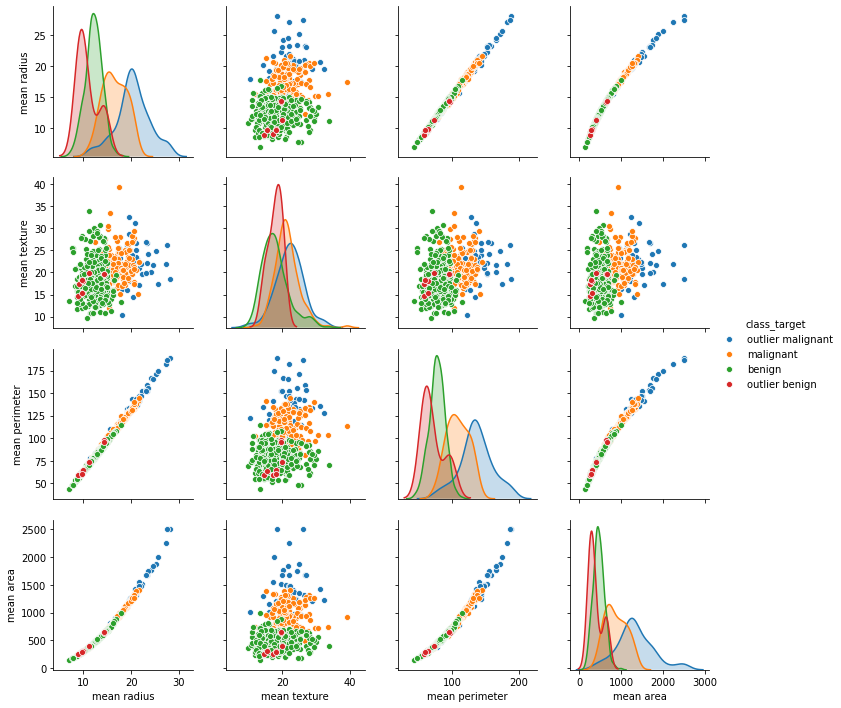

In [7]:
# Graphically
import seaborn as sns
import matplotlib.pyplot as plt

breast_encoded = breast.copy()
breast_encoded.class_target.replace(['malignant', 'benign'], [1, 2], inplace=True)
breast_encoded.class_target.values[outlier_positions_mah] += 2
breast_encoded.class_target.replace([1, 2, 3, 4], 
                             ['malignant', 'benign', 'outlier malignant', 'outlier benign'], inplace=True)
b = breast_encoded.iloc[:, 0:4]
b['class_target'] = breast_encoded.class_target
sns.pairplot(b, hue='class_target', vars=breast_set.feature_names[0:4], height=2.5);
plt.show()

### Individually

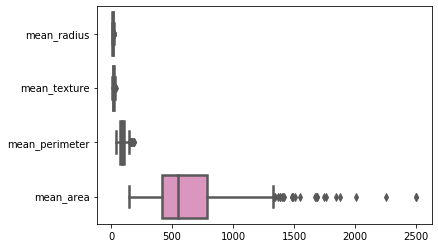

In [8]:
import seaborn as sns
from sklearn import datasets
import pandas as pd

outlier_data = breast_encoded.iloc[:, 0:4]
outlier_data['class_target'] = breast_encoded.class_target
outlier_data.columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'class_target']

ax = sns.boxplot(data=outlier_data[outlier_data.columns[:-1]], orient="h", palette="Set2", linewidth=2.5)
plt.show()


In [9]:
IQR = outlier_data.describe()["mean_area"]["75%"] - outlier_data.describe()["mean_area"]["25%"]
whiskers = [outlier_data.describe()["mean_area"]["25%"] - (1.5 * IQR), outlier_data.describe()["mean_area"]["75%"] + (1.5 * IQR)]
outlier_positions_box = [x for x in range(outlier_data.shape[0]) if outlier_data.mean_area.values[x] < whiskers[0] or outlier_data.mean_area.values[x] > whiskers[1]]
print("The outliers found are in positions:\n" + str(outlier_positions_box))
print("They correspond respectively to sepal widths:\n" + str(outlier_data.mean_area.values[outlier_positions_box]))
classes_names = ['malignant', 'benign']

classes_location = []
for x in outlier_data.class_target.values[outlier_positions_box]:
    classes_location.append(x)
print("They correspond respectively to classes:\n"+str(classes_location))

The outliers found are in positions:
[23, 82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339, 352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564]
They correspond respectively to sepal widths:
[1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]
They correspond respectively to classes:
['outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant', 'outlier malignant']


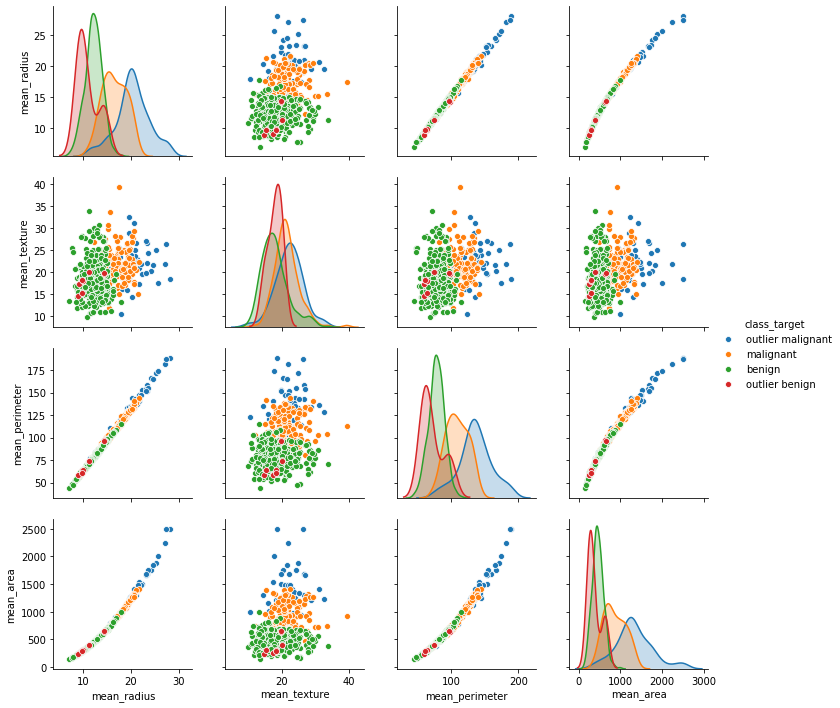

In [10]:
outlier_data.class_target.replace(['malignant', 'benign', 'outlier malignant', 'outlier benign'], [1, 2, 3, 4], inplace=True)
# Graphically

#outlier_data.class_target.values[outlier_positions_box] += 2
outlier_data.class_target.replace([1, 2, 3, 4], ['malignant', 'benign', 'outlier malignant', 'outlier benign'], inplace=True)
sns.pairplot(outlier_data, hue='class_target', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area'], height=2.5);
plt.show()

#### Remove in parallel

In [11]:
import numpy as np
outlier_data.class_target.replace(['malignant', 'benign', 'outlier malignant', 'outlier benign'], [1, 2, 1, 2], inplace=True)
outlier_free_data = outlier_data
outlier_positions = list(np.sort(outlier_positions_mah + outlier_positions_box))
outlier_free_data.drop(outlier_free_data.index[outlier_positions], inplace=True)
outlier_free_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,class_target
count,508.000000,508.000000,508.000000,508.000000,508.000000
mean,13.518006,19.036201,87.626280,587.764370,1.687008
std,2.813918,4.256198,19.182241,253.961084,0.464168
min,6.981000,9.710000,43.790000,143.500000,1.000000
25%,11.607500,15.965000,74.337500,411.800000,1.000000
50%,13.050000,18.600000,84.230000,524.500000,2.000000
75%,14.970000,21.530000,97.470000,687.000000,2.000000
max,20.600000,39.280000,140.100000,1326.000000,2.000000


#### And plot

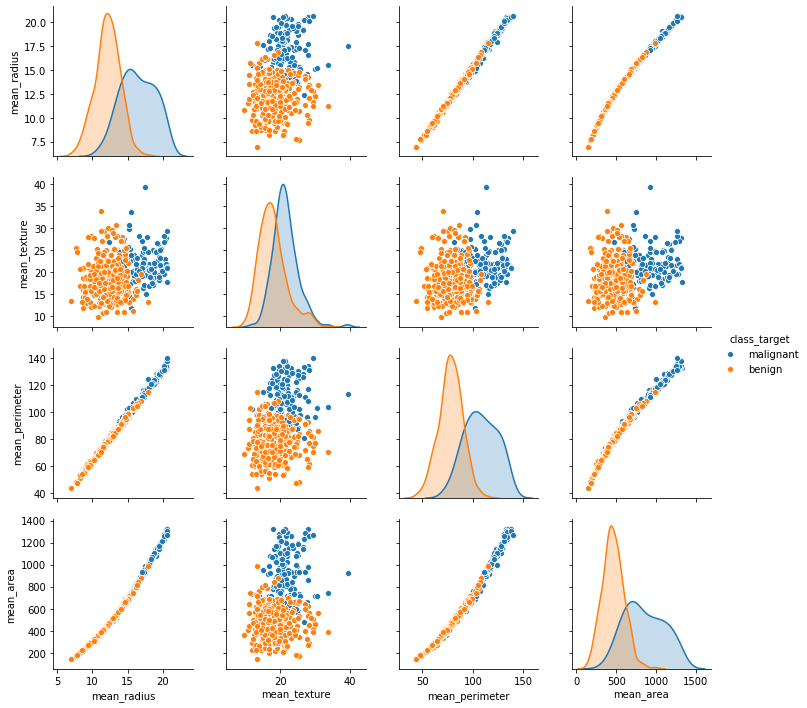

In [12]:
outlier_free_data.class_target.replace([1, 2], ['malignant', 'benign'], inplace=True)
sns.pairplot(outlier_free_data, hue='class_target', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area'], height=2.5);
plt.show()

## Discretization
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

# quantile: equal frequency | uniform: identical widths
def discretized_dataframe_creation(df, n_bins=5, encode='ordinal', strategy='quantile'):
    '''Discretization of the inputs and reconstruction on dataframe format'''
    X = KBinsDiscretizer(n_bins, encode, strategy).fit_transform(df.values[:, :-1])
    discretized_dataframe = pd.DataFrame(data=X, index=None, columns=df.columns[:-1], dtype=None, copy=False)
    discretized_dataframe = pd.concat([discretized_dataframe, df[df.columns[-1]]], axis=1)
    return discretized_dataframe

## Feature Extraction
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* **n_components is float**: select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

* **n_components is int**: Number of components to keep

In [14]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

breast_set = datasets.load_breast_cancer()
breast = pd.DataFrame(breast_set.data, columns = breast_set.feature_names)
breast["class_target"] = breast_set.target
breast.class_target.replace([0, 1], ['malignant', 'benign'], inplace=True)

def pca_projections(df, n_components=0.95):
    pca = PCA(n_components)
    X = df[df.columns[:-1]]  # Assuming the class in in the last column
    pca.fit(X)
    X = pca.transform(X)
    proj_df = pd.DataFrame(data=X, columns=['PC' + str(x) for x in list(range(1, X.shape[1] + 1))])
    proj_df = pd.concat([proj_df, df[df.columns[-1]]], axis=1)
    return proj_df

X = breast_set.data
y = breast_set.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pca = PCA(n_components=0.99)
pca.fit(X)
X_reduced = pca.transform(X)

pca_data = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2']) # these number of columns depends on the dataset
pca_data = pd.concat([pca_data, breast[breast.columns[-1]]], axis=1)

# NOTE: The names of the columns were given knowing that the amount of selected PCs was going to be 2
# In the next piece of code we generalize it using a list comprehension
print("There have been selected " + str(X_reduced.shape[1]) + " principal components.")
print("Meaning of the " + str(X_reduced.shape[1]) + " components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area'])))

There have been selected 2 principal components.
Meaning of the 2 components:
0.005 x mean_radius + 0.002 x mean_texture + 0.035 x mean_perimeter + 0.517 x mean_area
0.009 x mean_radius + -0.003 x mean_texture + 0.063 x mean_perimeter + 0.852 x mean_area


### Plot 2PC into a scatter plot

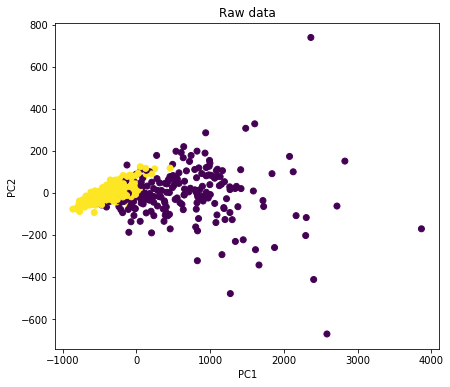

In [16]:
# NOTE: This 2-D plot with the first two PCs would rise an error if the amount of selected PCs were 1 (e.g. if PCA(n_components=0.90))
fig, (ax1) = plt.subplots(figsize=(6, 6), ncols=1)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.3)
y_raw = pca_data.class_target.values
y_clean = pca_data.class_target.values
ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha = 1.0)
ax1.set_title('Raw data')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

plt.show()

## Imbalanced data

### Undersampling

In [17]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from imblearn.metrics import classification_report_imbalanced

print('Training statistics: {}'.format(Counter(y_train)))
print('Testing statistics: {}'.format(Counter(y_test)))

pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC(random_state=0, max_iter=100000))
pipeline.fit(X_train, y_train)
print(classification_report_imbalanced(y_test, pipeline.predict(X_test), digits=4))

Training statistics: Counter({1: 267, 0: 159})
Testing statistics: Counter({1: 90, 0: 53})
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8814    0.9811    0.9222    0.9286    0.9512    0.9102        53
          1     0.9881    0.9222    0.9811    0.9540    0.9512    0.8995        90

avg / total     0.9485    0.9441    0.9593    0.9446    0.9512    0.9034       143



### Oversampling

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier

# Pipeline creation
pipeline = make_pipeline(SMOTE(random_state=0),
                         RandomForestClassifier(n_estimators=10, random_state=0))
pipeline.fit(X_train, y_train)
# Classification and results presentation
print(classification_report_imbalanced(y_test, pipeline.predict(X_test), digits=4, target_names=["Healthy", "Sick"]))

                   pre       rec       spe        f1       geo       iba       sup

    Healthy     0.8983    1.0000    0.9333    0.9464    0.9661    0.9396        53
       Sick     1.0000    0.9333    1.0000    0.9655    0.9661    0.9271        90

avg / total     0.9623    0.9580    0.9753    0.9584    0.9661    0.9317       143



## Grid Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from imblearn.metrics import classification_report_imbalanced

param_learning_rate = [0.1, 0.001, 0.0001]
param_max_iter = [500, 1000, 5000, 10000, 50000]
param_random_state = range(0, 15)
param_average = [True, False]
parameters = {'alpha': param_learning_rate,
              'max_iter': param_max_iter,
              'average': param_average,
              'random_state': param_random_state}

clf = SGDClassifier()
gs_clf = GridSearchCV(clf, parameters, cv=5, iid=True)
gs_clf.fit(X_train, y_train)

print("Best Score: ")
print(gs_clf.best_score_)
print("Best Params: ")
print(gs_clf.best_params_)
print(classification_report_imbalanced(y_test, gs_clf.predict(X_test)))

Best Score: 
0.9248826291079812
Best Params: 
{'alpha': 0.001, 'average': True, 'max_iter': 500, 'random_state': 8}
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.85      0.90      0.84      0.87      0.76        53
          1       0.91      0.90      0.85      0.91      0.87      0.77        90

avg / total       0.88      0.88      0.87      0.88      0.87      0.77       143

